# CMPT 423/820
## Assignment 4 Question 3
* Seyedeh Mina Mousavifar
* 11279515
* sem311

The task in this notebook is to apply and compare two clustering methods: K-Means and Guassian Mixture Models to a simple dataset.  Since clustering is typically an unsupervised learning task, we'll start by admiring the clusters.  But the training data we'll use has a class label, so in our exercise, we'll strip the label, do the clustering, and then we'll be able to compare the clusters found to the true labels.  We'll do this visually.

To complete this question:
1.  Complete **Step 3**
1.  Complete **Step 4**
1.  Answer the questions below.
1.  Make a PDF of this notebook and submit your PDF to Moodle.


First some libraries...

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1
The ```a4q1.csv``` file is a copy of one of the data files we used earlier in the term.  It has 4 columns: ```index, x, y, L```, where ```L``` represents a label.  The ```x, y``` are continuous quantities, good for plotting in 2D.  We will only use ```L``` to colourize our figures.

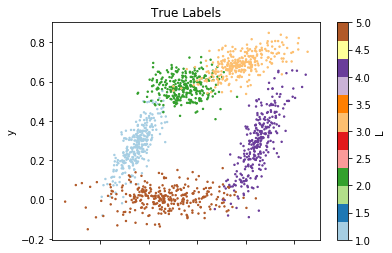

In [4]:
df = pd.read_csv('data/a4q3.csv', index_col=0)

# Plot the data with each label 'L' getting a different color

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

## Step 2
Now we'll strip off the labels, and set up some variables for use by the fitting methods.

In [5]:
# just the input features
X_df = df[['x', 'y']]

# just the labels.
L_df = df['L']

# the number of true classes in the data
n_classes = len(np.unique(L_df))

# the number of clusters to seek; experiment with this!
n_components = n_classes

## Step 3
Fit the KMeans model to the features of the data set.

In [6]:
from sklearn.cluster import KMeans

# create the model object
kmeans_estimator = KMeans(n_clusters= n_classes, 
                          n_init=10,
                          init = 'k-means++',
                          random_state=0)

# fit on all the data
kmeans_estimator.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## Step 4
Fit the GMM model to the features of the data set.

In [9]:
from sklearn.mixture import GaussianMixture

# create the model object
gmm_estimator = GaussianMixture(n_components= n_classes,
                                covariance_type = 'full',
                                init_params='kmeans',
                                random_state=0)

# fit on all the data
gmm_estimator.fit(X_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## Step 5
Plot the centroids along with the labelled data.

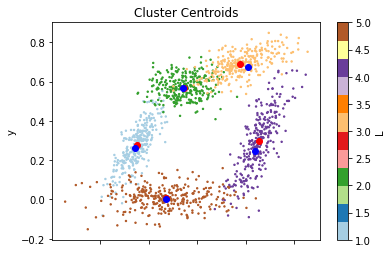

In [10]:
# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

## Questions
1.  The ```KMeans``` method allows us to indicate how the initial centroids are chosen:
  * ```init='k-means++'``` (this is the default behaviour)
  * ```init='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.  When you're done, return to the default behaviour for the next part.

2. The ```GMM``` method allows us to indicate how the initial centroids are chosen:
  * ```init_params='kmeans'``` (this is the default behaviour)
  * ```init_params='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.

## Answers

### 1.
The ```init``` parameter specifies the initialization method for the center of the clusters. Given enough time, K-means will always converge; however, this may be to a local minimum. The convergence is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. Here are two methods for initialization:


* ```k-means++``` selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
* ```random``` chooses k observations (rows) at random from data for the initial centroids.


```init=k-means++``` initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization. However, this change doesn't show a substantial difference between centroids, because of doing the computation for ten times.

![](images/km-random.png)

### 2.

The ```init_param``` parameter specifies the initialization method for the weights, the means and the precisions. 


* ```kmeans``` performs k-means algorithm and uses the obtained centers and covariance matrix to initialize GMM.
* ```random``` chooses k observations (rows) at random from data for the initial centroids.


As we can see, ```init_param=random``` leads to converging to a local maximum and fails to identify the correct center of clusters. Furthermore, ```init_param=kmeans``` gives a good starting point and help the model converge faster.

![](images/gmm-random.png)

### Grading: 12 marks
1. Step 3. 3 marks.
1. Step 4. 3 marks.
1. Answer to question 1 above (3 marks).
1. Answer to question 2 above (3 marks).